# UDACITY PROJECT 4 - WRANGLE AND ANALYZE DATA
## DOG TWITTER DATA ANALYSIS 
### *Jhonatan Nagasako*
#### *24-FEB-2021*

<hr size="5"/>

<a id='contents'></a>
# Table of Contents

<ul>
<li><a href="#intro">A. INTRODUCTION</a></li>
<li><a href="#scope">B. PROJECT MOTIVATION-SCOPE</a></li>
<li><a href="#gather">1. GATHERING DATA</a></li>
<li><a href="#assess">2. ASSESSING DATA</a></li>
<li><a href="#clean">3. CLEANING DATA</a></li>
<li><a href="#store">4. STORING AND ACTING ON WRANGLED DATA</a></li>
<li><a href="#report">5. REPORT-DISCUSSION-CONCLUSION</a></li>
<li><a href="#files">6. PROJECT FILES</a></li>
</ul>

<hr size="5"/>

<a id='intro'></a>
# A. INTRODUCTION

Real-world data rarely comes clean. Using Python and its libraries, data was gathered from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. Data wrangling efforts was documented in a Jupyter Notebook, which was then showcased  through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that used for wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs [downloaded their Twitter archive](https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive) and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.


![dog and twitter](https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg)

*Image via [Boston Magazine](https://www.bostonmagazine.com/arts-entertainment/2017/04/18/dog-rates-mit/)*

<a href="#contents">[Table of Contents]</a>

<a id='scope'></a>
# B. Project Motivation
## Context
The goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## The Data
### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

![table of tweets analyzed](https://video.udacity-data.com/topher/2017/October/59dd4791_screenshot-2017-10-10-18.19.36/screenshot-2017-10-10-18.19.36.png)
*The extracted data from each tweet's text*

### Extracted data from tweet text
The extracted data from each tweet's text

This provided data set was extracted programmatically, but more processing (e.g., cleaning and tyding) is requried. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. As stated before more data processing is required to assess and clean these columns for later analysis and visualization.

![dog dictionary](https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png)
*The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the [#WeRateDogs book on Amazon](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145))*

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. The WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. The Twitter's API was used to query this valuable data. 

**Please note that the Twitter API was NOT utilized for this project for data securty/privacy reasons. This data was provided for the scope of this project.**

### Image Predictions File

One more cool thing: Every image in the WeRateDogs Twitter archive was processed through a [neural network](https://www.youtube.com/watch?v=2-Ol7ZB0MmU) that can classify breeds of dogs* (provided by project). The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

![tweet image prediction](https://video.udacity-data.com/topher/2017/October/59dd4d2c_screenshot-2017-10-10-18.43.41/screenshot-2017-10-10-18.43.41.png)
*Tweet image prediction data*

### Image predictions
Tweet image prediction data

So for the last row in that table:

tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* p1 is the algorithm's #1 prediction for the image in the tweet → **golden retriever**
* p1_conf is how confident the algorithm is in its #1 prediction → **95%**
* p1_dog is whether or not the #1 prediction is a breed of dog → **TRUE**
* p2 is the algorithm's second most likely prediction → **Labrador retriever**
* p2_conf is how confident the algorithm is in its #2 prediction → **1%**
* p2_dog is whether or not the #2 prediction is a breed of dog → **TRUE**
* etc.

And the #1 prediction for the image in that tweet was spot on:

@dog_rates tweet
![gold retriever](https://video.udacity-data.com/topher/2017/October/59dd4e05_dog-pred/dog-pred.png)
*A golden retriever named Stuart*

So that's all fun and good. But all of this additional data will need to be gathered, assessed, and cleaned--which is the scope of this project

## Key Points
Key points to keep in mind when data wrangling for this project:

* Only use original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* It is not required to gather tweets beyond August 1st, 2017 because it is out of scope. Image predictions cannot be gathered for new tweet data after this date because the source file for the image prediction is not provided--again out of scope for this project

<a href="#contents">[Table of Contents]</a>

<hr size="5"/>

<a id='gather'></a>
# 1. GATHERING DATA

<font color=blue>

## Gathering Data - Set 1 Requirements
**1.1 CRITERIA:** The student is able to gather data from a variety of sources and file formats.

**1.1 SPECIFICATION:**
Data is successfully gathered:
* From at least the three (3) different sources on the Project Details page.
* In at least the three (3) different file formats on the Project Details page.

Each piece of data is imported into a separate pandas DataFrame at first.

<a href="#contents">[Table of Contents]</a>

In [1]:
# import statements for all of the packages used for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm;

# package required to get images from twitter data
import requests

# package required to access json file
import json


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

### Gather Specification 1 - data provided (e.g., via flashdrive)

<a href="#gather">[Gathering Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [2]:
# Gather Specification 1 - file given (file provided via flashdrive)
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Gather Specification 2 - data accessed by internet via Requests library

<a href="#gather">[Gathering Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [3]:
# Gather Specification 2 - access via internet to get images for predictions, accessed programmatically
# https://pypi.org/project/requests/

# note that running this code will generate the file "image_prediction.tsv"

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
                auth=('user','pass'))

# better check status and 
assert r.status_code == 200, 'Request corruption detected, status code is supposed to be 200 (aka "HTTP OK Success")'
assert r.encoding == 'utf-8', 'Request corruption detected, encoding was NOT \'utf-8\' (will cause issues later in json coding)'

open('image_prediction.tsv', 'wb').write(r.content)
df_prediction = pd.read_csv('image_prediction.tsv', sep='\t')
df_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Gather Specification 3 - data accessed by internet via Twitter API Tweepy

<a href="#gather">[Gathering Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [4]:
# Gather Specification 3 - json file
# https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
twitter_list =[]

with open('tweet-json.txt', encoding='utf-8') as json_file:
    for each_dictionary in json_file:   
        
        tweets_dict = {} # the dictionary terms are stored here
        tweets_json = json.loads(each_dictionary)
        
        tweets_dict['tweet_id'] = tweets_json['id_str']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        tweets_dict['full_text'] = tweets_json['full_text']
        
        twitter_list.append(tweets_dict)

# write to dataframe
df_twitter = pd.DataFrame(twitter_list)
df_twitter.head(3)

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...


<font color='red'>

**_Code below is required to programically interface and gather data from TWITTER using the ```Tweepy``` API. However, I used the provided file instead because I do NOT want to create Twitter account for cyber securty/privacy reasons._**

<font color='blue'>
             
> Essentially, you will run the Twitter API with will get you a JSON file (code block below). This JSON file will then be read using Python to get the ```tweet-json.txt``` used in the code block above. 


```
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```


## End of Gathering Data Section

<a href="#gather">[Gathering Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

<hr size="5"/>

<a id='assess'></a>
# 2. ASSESSING DATA

<font color=blue>

**2.1 CRITERIA:** The student is able to assess data visually and programmatically for quality and tidiness.

**2.1 SPECIFICATION:**
Two types of assessment are used:

* Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
* Programmatic assessment: pandas' functions and/or methods are used to assess the data.

---

**2.2 CRITERIA:** The student is able to thoroughly assess a dataset.

**2.2 SPECIFICATION:**
At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.

<a href="#2.1">[Specification 2.1]</a>
<a href="#2.2">[Specification 2.2]</a>
<a href="#contents">[Table of Contents]</a>

<a id='2.1'></a>

## Assess Specification 2.1 - Assessing data visual assessment (e.g., via CSV)

* Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

<a href="#assess">[Assessing Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

Current dataframes active from **_Section 1. GATHER_**
1. ```df_archive``` = tweet metadata
2. ```df_prediction``` = tweet picture prediction
3. ```df_twitter``` = tweet retweet_count, favorite_count, and full_text

In [5]:
# visual assessment - warning to user that opening these files "may" cause viewing software to crash
# help: https://www.guru99.com/python-check-if-file-exists.html

import os.path
from os import path
fileFlag = False # initilized as FALSE -- assuming .csv files have not be created from dataframes in this notebook

In [6]:
# help: https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/
def createCSV():
    # adding "1-" for easier file handling in folder
    df_archive.to_csv('1-archive.csv')
    df_prediction.to_csv('1-prediction.csv')
    df_twitter.to_csv('1-twitter.csv')
    fileFlag = True
    print('.csv Files created ... Ready for user VISUAL assessment')
    return fileFlag

if path.exists('1-archive.csv') == True and path.exists('1-prediction.csv') == True and path.exists('1-twitter.csv') == True:
    print("Files aready created! ... Ready for user VISUAL assessment")
elif fileFlag == False:
    fileFlag = createCSV() # Assign returned tuple , execute file create assuming fileFlag is FALSE (has not be done)
else:
    assert path.exists('1-archive.csv') == True, "You need to create the 1-archive.csv file"
    assert path.exists('1-prediction.csv') == True, "You need to create the 1-prediction.csv file"
    assert path.exists('1-twitter.csv') == True, "You need to create the 1-twitter.csv file"
    print("Files exists! ... Ready for user VISUAL assessment")

# could add button here for "confirmation" data was reviewed

Files aready created! ... Ready for user VISUAL assessment


## Assess Specification 2.1 - Assessing data PROGRAMMICALLY assessment (e.g., via CSV)

* Programmatic assessment: pandas' functions and/or methods are used to assess the data.

<a href="#assess">[Assessing Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [7]:
# Programmically assessment of data

#import the newly created .csv files
df_archive = pd.read_csv('1-archive.csv')
df_prediction = pd.read_csv('1-prediction.csv')
df_twitter = pd.read_csv('1-twitter.csv')

<font color='blue'>

Review ```df_archive``` data programmatically

In [8]:
df_archive.head(3)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   int64  
 12  rating_denominator          2356 non-null   int64  
 13  name                        2356 

<font color='blue'>

Review ```df_prediction``` data programmatically

In [10]:
df_prediction.head(3)

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2075 non-null   int64  
 1   tweet_id    2075 non-null   int64  
 2   jpg_url     2075 non-null   object 
 3   img_num     2075 non-null   int64  
 4   p1          2075 non-null   object 
 5   p1_conf     2075 non-null   float64
 6   p1_dog      2075 non-null   bool   
 7   p2          2075 non-null   object 
 8   p2_conf     2075 non-null   float64
 9   p2_dog      2075 non-null   bool   
 10  p3          2075 non-null   object 
 11  p3_conf     2075 non-null   float64
 12  p3_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


<font color='blue'>

Review ```df_twitter``` data programmatically

In [12]:
df_twitter.head(3)

,Unnamed: 0,tweet_id,retweet_count,favorite_count,full_text
0,0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...


In [13]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2354 non-null   int64 
 1   tweet_id        2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
 4   full_text       2354 non-null   object
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


<a id='2.2'></a>

## Assess Specification 2.2 - Identify data quality and tidiness issues and steps for cleaning

* At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.

**Tips for Tidying**
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table
*Reference for [tidy data here](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)*

**Tips for Common Data Quality Issues**
1. Missing data
2. Invalide data (e.g., state a negative height, or other datatype validation errors--str vs int vs float, think there can only be 2 people in a room... not 2.54 people in a room... *unless there's ghosts lol*)
3. Inaccurate data (e.g., specifying a foot = 5 inches, which is WRONG. A foot = 12 inches)
4. Inconsistent data (e.g., mixing up units, some data captured as cm instead of inches)

<a href="#assess">[Assessing Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [14]:
# another look at the data, determine what cleaning steps are required
print('archive data\n')
df_archive.info()
print('______________________________________________________________\n')

print('prediction data\n')
df_prediction.info()
print('______________________________________________________________\n')

print('twitter data\n')
df_twitter.info()
print('______________________________________________________________\n')


archive data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   int64  
 12  rating_denominator          2356 non-null   int64  
 13  name               

In [15]:
print('Any duplicated records in df_archive? -->', df_archive.duplicated().sum())
print('Any duplicated records in df_prediction? --> ', df_prediction.duplicated().sum())
print('Any duplicated records in df_twitter? --> ',df_twitter.duplicated().sum())

Any duplicated records in df_archive? --> 0
Any duplicated records in df_prediction? -->  0
Any duplicated records in df_twitter? -->  0


In [16]:
print('Any missing records in df_archive?\n', df_archive.isnull().sum())
print('\nAny missing records in df_prediction?\n', df_prediction.isnull().sum())
print('\nAny missing records in df_twitter?\n',df_twitter.isnull().sum())

Any missing records in df_archive?
 Unnamed: 0                       0
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Any missing records in df_prediction?
 Unnamed: 0    0
tweet_id      0
jpg_url       0
img_num       0
p1            0
p1_conf       0
p1_dog        0
p2            0
p2_conf       0
p2_dog        0
p3            0
p3_conf       0
p3_dog        0
dtype: int64

Any missing records in df_twitter?
 Unnamed: 0        0
twe

In [17]:
print('archive data\n')
df_archive.nunique()

archive data



Unnamed: 0                    2356
tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
print('prediction data\n')
df_prediction.nunique()

prediction data



Unnamed: 0    2075
tweet_id      2075
jpg_url       2009
img_num          4
p1             378
p1_conf       2006
p1_dog           2
p2             405
p2_conf       2004
p2_dog           2
p3             408
p3_conf       2006
p3_dog           2
dtype: int64

In [19]:
print('twitter data\n')
df_twitter.nunique()

twitter data



Unnamed: 0        2354
tweet_id          2354
retweet_count     1724
favorite_count    2007
full_text         2354
dtype: int64

In [20]:
# quick looks at statis to determine spread to eliminate outliers
ratings_level = 100*(df_archive.rating_numerator / df_archive.rating_denominator)
ratings_level
ratings_level.describe()

# so, lets make the cut-off point for exceedingly high levels of ratings be 120%... 
# but that deletes over 400 records... so lets say 150% then! Only 12 records removed!

count    2356.0
mean        inf
std         NaN
min         0.0
25%       100.0
50%       110.0
75%       120.0
max         inf
dtype: float64

In [21]:
# quick look at the stats of retweets and favorites to understand spread to remove "zero" values
df_twitter.describe()

# actually, lets not remove anything, this is data from Twitter database, 
# these "zero" because low probability that they were mistakes 

,Unnamed: 0,tweet_id,retweet_count,favorite_count
count,2354.000000,2.354000e+03,2354.000000,2354.000000
mean,1176.500000,7.426978e+17,3164.797366,8080.968564
std,679.685589,6.852812e+16,5284.770364,11814.771334
min,0.000000,6.660209e+17,0.000000,0.000000
25%,588.250000,6.783975e+17,624.500000,1415.000000
50%,1176.500000,7.194596e+17,1473.500000,3603.500000
75%,1764.750000,7.993058e+17,3652.000000,10122.250000
max,2353.000000,8.924206e+17,79515.000000,132810.000000


<font color='red'>

<a id='todo'></a>
## QUALITY (click hyperlink question to go to section in notebook!)

<a href="#quality-section">[Go to QUALITY section]</a>
    
1. <a href="#Q1">[all dataframes --> Remove missing data column ```Unnamed: 0```]</a>
    
    
2. <a href="#Q2">[Missing data, Drop columns:]</a>
    * df_archive
        * in_reply_to_status_id
        * in_reply_to_user_id
        * retweeted_status_id
        * retweeted_status_user_id
        * retweeted_status_timestamp
        * expanded_urls 
        * in_reply_to_status_id
        * in_reply_to_user_id 
    
    
3. <a href="#Q3">[df_archive --> convert columns to boolean for easier analysis]</a> 
    * doggo
    * floofer
    * pupper
    * puppo

    
4. <a href="#Q4">[df_archive --> convert form object to in64]</a>
    * doggo
    * floofer
    * pupper
    * puppo
    
    
5. <a href="#Q5">[df_archive --> need for classification of ```floof``` for dogs that did not meeting the four listed catagories below:]</a>
    * doggo
    * floofer
    * pupper
    * puppo
    
    
6. <a href="#Q6">[df_archive --> remove entries with EXTREME ratings outliers (anything above 150%). Those entries are:]</a> 
    * 55 with 170%
    * 188 with 4200%
    * 189 with 6660%
    * 290 with 1820%
    * 340 with 750%
    * 516 with 343%
    * 695 with 750%
    * 763 with 270%
    * 979 with 17760% wow!
    * 1712 with 260%
    * 2074 with 4200%

    
7. <a href="#Q7">[df_archive --> remove entry 313 because no denominator is provided (entered as 0)]</a>

    
8. <a href="#Q8">[df_prediction --> make all names of dogs CAPITALIZED, to prevent any variants of different capitilizations]</a>

>*At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.*
    
>>**Tips for Common Data Quality Issues**
>>1. Missing data
2. Invalide data (e.g., state a negative height, or other datatype validation errors--str vs int vs float, think there can only be 2 people in a room... not 2.54 people in a room... *unless there's ghosts lol*)
3. Inaccurate data (e.g., specifying a foot = 5 inches, which is WRONG. A foot = 12 inches)
4. Inconsistent data (e.g., mixing up units, some data captured as cm instead of inches)



## TIDINESS
    
<a href="#tidy-section">[Go to TIDY section]</a>
    
1. <a href="#T1">[Combine all seperated tables, join by ```tweet_id```]</a>

    
2. <a href="#T2">[df_twitter drop column ```full_text``` because it contains multiple observational units (e.g., name, url, score, etc.)]</a>

>*At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.*
    
>>**Tips for Tidying**
>>1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table
*Reference for [tidy data here](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)*
    
## FEATURE ENGINEEERING
1. df_archive
    * create a percentage column of the numerator and denometer ratings
    * create column for twitter-web vs twitter-phone vs twitter-tweetdeck vs vine source
    * create a column for "bonus" for any ratings that exceed score of 10
    
<a href="#assess">[Assessing Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

<hr size="5"/>

<a id='clean'></a>
# 3. CLEANING DATA

<font color=blue>
    
**3.1 CRITERIA:** The student uses the steps in the data cleaning process to guide their cleaning efforts.

**3.1 SPECIFICATION:**
The define, code, and test steps of the cleaning process are clearly documented.

---
    
**3.2 CRITERIA:** The student is able to thoroughly clean a dataset programmatically.

**3.2 SPECIFICATION:**

Copies of the original pieces of data are made prior to cleaning.

All issues identified in the assess phase are successfully cleaned (if possible) using Python and pandas, and include the cleaning tasks required to satisfy the Project Motivation.

A tidy master dataset (or datasets, if appropriate) with all pieces of gathered data is created.
    
<a href="#todo">[Cleaning and Tidying To-do List]</a> 
<a href="#3.1">[Specification 3.1]</a>
<a href="#3.2">[Specification 3.2]</a>
<a href="#contents">[Table of Contents]</a>

<a id='3.1'></a>

## Cleaning Specification 3.1 and 3.2 - Cleaning Data (notes captured in codeblocks and markdown as required)

<a href="#clean">[Cleaning Data Requirements]</a> 
<a href="#todo">[Cleaning and Tidying To-do List]</a> 
<a href="#contents">[Table of Contents]</a>

<a id='quality-section'></a>

<font color='red'>
    
## QUALITY ISSUES ADDRESSED -- note that ```df``` will change to ```dfc``` to indicate cleaned data
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

<a id='Q1'></a>

<font color='red'>

### ✔️ 1. all dataframes --> Remove missing data column ```Unnamed: 0```

<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [22]:
# before cleaning
print("df_archive data column names\n", list(df_archive.columns))
print("\ndf_prediciton data column names\n", list(df_prediction.columns))
print("\ndf_twitter data column names\n", list(df_twitter.columns))

df_archive data column names
 ['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']

df_prediciton data column names
 ['Unnamed: 0', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

df_twitter data column names
 ['Unnamed: 0', 'tweet_id', 'retweet_count', 'favorite_count', 'full_text']


In [23]:
# all data frames drop column "Unnamed: 0", assign new df names -- incase we screw something up
dfc_archive = df_archive.drop(columns = ['Unnamed: 0']);
dfc_prediction = df_prediction.drop(columns = ['Unnamed: 0']);
dfc_twitter = df_twitter.drop(columns = ['Unnamed: 0']);

In [24]:
# verification that headers removed
print("dfc_archive data column names\n", list(dfc_archive.columns))
print("\ndfc_prediciton data column names\n", list(dfc_prediction.columns))
print("\ndfc_twitter data column names\n", list(dfc_twitter.columns))

dfc_archive data column names
 ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']

dfc_prediciton data column names
 ['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

dfc_twitter data column names
 ['tweet_id', 'retweet_count', 'favorite_count', 'full_text']


<a id='Q2'></a>

<font color='red'>
    
### ✔️ 2. Missing data, Drop columns:

* df_archive
    * in_reply_to_status_id
    * in_reply_to_user_id
    * retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp
    * expanded_urls 
    * in_reply_to_status_id
    * in_reply_to_user_id 
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [25]:
# before cleaning
print("dfc_archive data column names\n", list(dfc_archive.columns))

dfc_archive data column names
 ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [26]:
# drop columns with missing data because they do not provide value at this point
dfc_archive = dfc_archive.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                         'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
                                         'in_reply_to_status_id', 'in_reply_to_user_id']);

In [27]:
# verification after cleaning
print("dfc_archive data column names\n", list(dfc_archive.columns))

dfc_archive data column names
 ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<a id='Q3'></a>

<font color='red'>

    
### ✔️  3. df_archive --> convert columns to boolean for easier analysis
* doggo
* floofer
* pupper
* puppo
   
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [28]:
# visual review dfc_archive
dfc_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [29]:
# programmically review the counts for these dog columns
print('DOGGO column counts\n', dfc_archive.doggo.value_counts())
print('____________')
print('\nFLOOFER column counts\n', dfc_archive.floofer.value_counts())
print('____________')
print('\nPUPPER column counts\n', dfc_archive.pupper.value_counts())
print('____________')
print('\nPUPPO column counts\n', dfc_archive.puppo.value_counts())

DOGGO column counts
 None     2259
doggo      97
Name: doggo, dtype: int64
____________

FLOOFER column counts
 None       2346
floofer      10
Name: floofer, dtype: int64
____________

PUPPER column counts
 None      2099
pupper     257
Name: pupper, dtype: int64
____________

PUPPO column counts
 None     2326
puppo      30
Name: puppo, dtype: int64


In [30]:
# check datatype
dfc_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


In [31]:
# change dfc_archive to test for prototyping solution
test = dfc_archive

In [32]:
# replace all "None" with 0
# help: https://www.edureka.co/community/584/how-can-replace-values-with-none-in-a-dataframe-using-pandas
df1 = test.replace('None', 0)

df1.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0


In [33]:
print('"DOG name" column name count with "None" replaced with zero\n')
print('DOGGO column counts\n', df1.doggo.value_counts())
print('____________')
print('\nFLOOFER column counts\n', df1.floofer.value_counts())
print('____________')
print('\nPUPPER column counts\n', df1.pupper.value_counts())
print('____________')
print('\nPUPPO column counts\n', df1.puppo.value_counts())

"DOG name" column name count with "None" replaced with zero

DOGGO column counts
 0        2259
doggo      97
Name: doggo, dtype: int64
____________

FLOOFER column counts
 0          2346
floofer      10
Name: floofer, dtype: int64
____________

PUPPER column counts
 0         2099
pupper     257
Name: pupper, dtype: int64
____________

PUPPO column counts
 0        2326
puppo      30
Name: puppo, dtype: int64


In [34]:
# replace all "dog column name" with 1, could use function here...
df1 = df1.replace('doggo', 1)
df1 = df1.replace('floofer', 1)
df1 = df1.replace('pupper', 1)
df1 = df1.replace('puppo', 1)

In [35]:
print('"DOG name" column name count with "DOG name" replaced with one\n')
print('DOGGO column counts\n', df1.doggo.value_counts())
print('____________')
print('\nFLOOFER column counts\n', df1.floofer.value_counts())
print('____________')
print('\nPUPPER column counts\n', df1.pupper.value_counts())
print('____________')
print('\nPUPPO column counts\n', df1.puppo.value_counts())

"DOG name" column name count with "DOG name" replaced with one

DOGGO column counts
 0    2259
1      97
Name: doggo, dtype: int64
____________

FLOOFER column counts
 0    2346
1      10
Name: floofer, dtype: int64
____________

PUPPER column counts
 0    2099
1     257
Name: pupper, dtype: int64
____________

PUPPO column counts
 0    2326
1      30
Name: puppo, dtype: int64


<a id='Q4'></a>

<font color='red'>

    
### ✔️ 4. df_archive --> convert form object to in64

* doggo
* floofer
* pupper
* puppo
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [36]:
# method executed above converted all the datatypes to integers!
# but... the code below will convert those "DOG name" columns to 
# integers, lets also change the df5 name back to dfc_archive
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   int64 
 8   floofer             2356 non-null   int64 
 9   pupper              2356 non-null   int64 
 10  puppo               2356 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 202.6+ KB


In [37]:
# stirng to integer datatype
df1['doggo'] = df1['doggo'].astype(int)
df1['floofer'] = df1['floofer'].astype(int)
df1['pupper'] = df1['pupper'].astype(int)
df1['puppo'] = df1['puppo'].astype(int)

In [38]:
dfc_archive = df1
dfc_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   int32 
 8   floofer             2356 non-null   int32 
 9   pupper              2356 non-null   int32 
 10  puppo               2356 non-null   int32 
dtypes: int32(4), int64(3), object(4)
memory usage: 165.8+ KB


In [39]:
# quick visual check --> looks good!
dfc_archive.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
441,819711362133872643,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,11,10,Howie,0,0,0,0
1854,675534494439489536,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,11,10,a,0,0,0,0
838,767500508068192258,2016-08-21 23:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's making quite a h*ckin mess...,12,10,Louie,0,0,0,0
1243,711968124745228288,2016-03-21 17:30:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,10,10,Winston,0,0,1,0
48,882992080364220416,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,13,10,Rusty,0,0,0,0


---

<a id='Q5'></a>

<font color='red'>

    
### ✔️ 5. df_archive --> need for classification of ```floof``` for dogs that did not meeting the four listed catagories below:
        
* doggo
* floofer
* pupper
* puppo
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [40]:
dfc_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   int32 
 8   floofer             2356 non-null   int32 
 9   pupper              2356 non-null   int32 
 10  puppo               2356 non-null   int32 
dtypes: int32(4), int64(3), object(4)
memory usage: 165.8+ KB


In [41]:
# creating test dataframe for prototyping
test = dfc_archive

In [42]:
# help: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
def Dog_Class(row):
   if row['doggo'] == 1 :
      return 'doggo'
   if row['floofer'] == 1 :
      return 'floofer'
   if row['pupper'] == 1:
      return 'pupper'
   if row['puppo']  == 1:
      return 'puppo'
   if row['doggo'] + row['floofer'] + row['pupper'] + row['puppo'] > 1 :
      return 'Two or more? What the woof!? Going to find you a home!'
   return 'floof'

In [43]:
test.apply(lambda row: Dog_Class(row), axis=1)

0       floof
1       floof
2       floof
3       floof
4       floof
        ...  
2351    floof
2352    floof
2353    floof
2354    floof
2355    floof
Length: 2356, dtype: object

In [44]:
# apply new series as column in dataframe
test['Dog_Class'] = test.apply(lambda row: Dog_Class(row), axis=1)
test.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dog_Class
1720,680145970311643136,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,10,10,Kawhi,0,0,1,0,pupper
230,847978865427394560,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,11,10,Charlie,0,0,0,0,floof
1569,687807801670897665,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,11,10,Trooper,0,0,0,0,floof
860,763167063695355904,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,8,10,Eve,0,0,1,0,pupper
1268,709556954897764353,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,12,10,Cecil,0,0,0,0,floof


In [45]:
# just for reference... lets just make a floof column boolean
test['floof'] = np.where(test['Dog_Class']!= 'floof', 0, 1)
test.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dog_Class,floof
2157,669583744538451968,2015-11-25 18:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Special dog here. Pretty big. Neck kinda long ...,6,10,0,0,0,0,0,floof,1
1942,673711475735838725,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,10,10,0,0,0,0,0,floof,1
383,827199976799354881,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,13,10,Charlie,0,0,0,0,floof,1
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,1,0,0,0,doggo,0
2140,670003130994700288,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,10,10,Raphael,0,0,0,0,floof,1


In [46]:
cols = list(test.columns.values)
cols

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'Dog_Class',
 'floof']

In [47]:
# move floof with other names
# help: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
test = test[['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
             'rating_denominator', 'name', 'doggo', 'floofer', 'pupper',
             'puppo', 'floof', 'Dog_Class']]
test.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,1,floof
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,1,floof
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,1,floof


In [48]:
# remove rows that have more than two classifications
count_dogs = test.groupby('Dog_Class')['tweet_id'].count()
count_dogs

Dog_Class
doggo        97
floof      1976
floofer       9
pupper      245
puppo        29
Name: tweet_id, dtype: int64

In [49]:
test['dog_class_count'] = test['doggo'] + test['floofer'] + test['pupper'] + test['puppo'] + test['floof']
test.sample(5)

<ipython-input-49-c37db09d9da1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dog_class_count'] = test['doggo'] + test['floofer'] + test['pupper'] + test['puppo'] + test['floof']


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count
646,793150605191548928,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,11,10,Nida,0,0,0,0,1,floof,1
1604,685906723014619143,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olive. He's stuck in a sleeve. 9/10 da...,9,10,Olive,0,0,0,0,1,floof,1
2053,671485057807351808,2015-12-01 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,11,10,Penelope,0,0,0,0,1,floof,1
341,832215726631055365,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,13,10,Moreton,0,0,0,0,1,floof,1
870,761672994376806400,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,10,10,0,0,0,0,0,1,floof,1


In [50]:
#dog_class_count should just have 1 state, that tells us there is classification
test.nunique()

tweet_id              2356
timestamp             2356
source                   4
text                  2356
rating_numerator        40
rating_denominator      18
name                   957
doggo                    2
floofer                  2
pupper                   2
puppo                    2
floof                    2
Dog_Class                5
dog_class_count          2
dtype: int64

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   int32 
 8   floofer             2356 non-null   int32 
 9   pupper              2356 non-null   int32 
 10  puppo               2356 non-null   int32 
 11  floof               2356 non-null   int32 
 12  Dog_Class           2356 non-null   object
 13  dog_class_count     2356 non-null   int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 202.6+ KB


In [52]:
# need to remove these double classes
remove = test.loc[test['dog_class_count'] == 2]
remove

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,0,1,0,0,1,0,doggo,2
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,0,1,1,0,0,0,doggo,2
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,1,0,1,0,0,doggo,2
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,0,1,0,1,0,0,doggo,2
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,0,1,0,1,0,0,doggo,2
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,1,0,1,0,0,doggo,2
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1,0,1,0,0,doggo,2
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,0,1,0,1,0,0,doggo,2
778,775898661951791106,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",12,10,0,1,0,1,0,0,doggo,2
822,770093767776997377,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,12,10,just,1,0,1,0,0,doggo,2


In [53]:
test.drop(remove.index, inplace=True)
test

C:\Users\nagasj2\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,1,floof,1
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,1,floof,1
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,1,floof,1
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,0,0,0,0,1,floof,1
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,0,0,0,0,1,floof,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,0,0,0,0,0,1,floof,1
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,0,0,0,0,1,floof,1
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,0,0,0,0,1,floof,1
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,0,0,0,0,1,floof,1


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2342 non-null   int64 
 1   timestamp           2342 non-null   object
 2   source              2342 non-null   object
 3   text                2342 non-null   object
 4   rating_numerator    2342 non-null   int64 
 5   rating_denominator  2342 non-null   int64 
 6   name                2342 non-null   object
 7   doggo               2342 non-null   int32 
 8   floofer             2342 non-null   int32 
 9   pupper              2342 non-null   int32 
 10  puppo               2342 non-null   int32 
 11  floof               2342 non-null   int32 
 12  Dog_Class           2342 non-null   object
 13  dog_class_count     2342 non-null   int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 219.6+ KB


In [55]:
# assign test to dfc_archive again
dfc_archive = test
dfc_archive.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,1,floof,1
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,1,floof,1


---

<a id='Q6'></a>

<font color='red'>


### ✔️ 6. df_archive --> remove entries with EXTREME ratings outliers (anything above 150%). Those entries are (checking sheet): 
             
* 55 with 170%
* 188 with 4200%
* 189 with 6660%
* 290 with 1820%
* 340 with 750%
* 516 with 343%
* 695 with 750%
* 763 with 270%
* 979 with 17760% wow!
* 1712 with 260%
* 2074 with 4200%
    
But we are going to do this programmically! ;)
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [56]:
# create column for ratings percentage
test = dfc_archive
test['ratings_percentage'] = test['rating_numerator'] / test['rating_denominator']
test.sample(3)

<ipython-input-56-328d4a8c29da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ratings_percentage'] = test['rating_numerator'] / test['rating_denominator']


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
2039,671547767500775424,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,10,10,Marley,0,0,0,0,1,floof,1,1.0
1487,693095443459342336,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,10,10,Milo,0,0,1,0,0,pupper,1,1.0
1713,680473011644985345,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,10,10,Hector,0,0,1,0,0,pupper,1,1.0


In [57]:
# these rows we know need to go--we will verify later...
# help: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

drop = dfc_archive.iloc[[55, 188, 189, 290, 340, 516, 695, 763, 979, 1712, 2074],:]
drop

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,17,10,0,0,0,0,0,1,floof,1,1.700000
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,420,10,0,0,0,0,0,1,floof,1,42.000000
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,666,10,0,0,0,0,0,1,floof,1,66.600000
292,838083903487373313,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,13,10,Daisy,0,0,0,0,1,floof,1,1.300000
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,0,0,0,0,0,1,floof,1,0.733333
519,810284430598270976,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,13,10,Phil,0,0,0,0,1,floof,1,1.300000
701,786051337297522688,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,13,10,0,0,0,0,1,0,puppo,1,1.300000
771,776813020089548800,2016-09-16 16:00:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Solomon. He was arrested for possession o...,12,10,Solomon,0,0,0,0,1,floof,1,1.200000
991,748699167502000129,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,0,0,0,0,1,floof,1,1.100000
1726,680055455951884288,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",10,10,Sammy,0,0,0,0,1,floof,1,1.000000


In [58]:
print('shape of dataset', test.shape)
print('unique value count check for "Ratings_Percentage" = ', test.ratings_percentage.nunique())

shape of dataset (2342, 15)
unique value count check for "Ratings_Percentage" =  30


In [59]:
# BEFORE DROPPING ROWS
# status review -- there is an undefine value
test.describe() 

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,floof,dog_class_count,ratings_percentage
count,2.342000e+03,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.0,2342.0
mean,7.424988e+17,13.137062,10.458155,0.035440,0.003843,0.104611,0.012383,0.843723,1.0,inf
std,6.862315e+16,46.013180,6.765284,0.184928,0.061885,0.306117,0.110610,0.363195,0.0,NaN
min,6.660209e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,6.783509e+17,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0
50%,7.186224e+17,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.1
75%,7.990311e+17,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.2
max,8.924206e+17,1776.000000,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,inf


<a id='Q7_solved'></a>

<font color='red'>
Note that this method here solves Quality Cleaning #7

<a href="#Q7">[Quality Cleaning #7 question]</a>

In [60]:
# drop rows over 10k for now, to remove infinite value
test_filtered = test[test['ratings_percentage'] <= 100000] 

print('shape of dataset', test_filtered.shape)
print('unique value count check for "Ratings_Percentage" = ', test_filtered.ratings_percentage.nunique())

shape of dataset (2341, 15)
unique value count check for "Ratings_Percentage" =  29


In [61]:
test_filtered.describe()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,floof,dog_class_count,ratings_percentage
count,2.341000e+03,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.0,2341.000000
mean,7.424592e+17,12.732593,10.462623,0.035455,0.003845,0.104656,0.012388,0.843657,1.0,1.222548
std,6.861101e+16,41.651087,6.763274,0.184966,0.061898,0.306175,0.110633,0.363258,0.0,4.095650
min,6.660209e+17,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,6.783411e+17,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
50%,7.186133e+17,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.100000
75%,7.989340e+17,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.200000
max,8.924206e+17,1776.000000,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,177.600000


In [62]:
# wow, ok, we need to remove any ratings over 177,600%! But lets filter out anything greater than 150%... so 1.5
test_filtered1 = test_filtered[test_filtered['ratings_percentage'] <= 1.5] 

print('shape of dataset', test_filtered1.shape)
print('unique value count check for "Ratings_Percentage" = ', test_filtered1.ratings_percentage.nunique())

shape of dataset (2330, 15)
unique value count check for "Ratings_Percentage" =  20


In [63]:
test_filtered1.describe()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,floof,dog_class_count,ratings_percentage
count,2.330000e+03,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.0,2330.000000
mean,7.422130e+17,11.201288,10.466094,0.035622,0.003863,0.104721,0.012446,0.843348,1.0,1.068737
std,6.852458e+16,8.010957,6.778778,0.185386,0.062043,0.306259,0.110891,0.363551,0.0,0.219110
min,6.660209e+17,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,6.782926e+17,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
50%,7.183508e+17,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.100000
75%,7.987010e+17,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.200000
max,8.924206e+17,204.000000,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.500000


In [64]:
# verify that the following rows below are removed
# range check: [54:56, 187:190, 289:291, 339:341, 515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [55, 188, 189, 290, 340, 516, 695, 763, 979, 1712, 2074]
test_filtered1.iloc[[55, 188, 189, 290, 340, 516, 695, 763, 979, 1712, 2074]]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,0,0,1,0,0,pupper,1,1.4
192,855818117272018944,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,13,10,0,0,0,0,0,1,floof,1,1.3
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",12,10,quite,0,0,0,0,1,floof,1,1.2
296,837366284874571778,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,13,10,Lucy,0,0,0,0,1,floof,1,1.3
348,831670449226514432,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,13,10,Daisy,0,0,0,0,1,floof,1,1.3
526,808838249661788160,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,13,10,Ito,0,0,0,0,1,floof,1,1.3
710,784826020293709826,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,13,10,Rusty,0,0,0,0,1,floof,1,1.3
781,775729183532220416,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,13,10,0,0,0,0,0,1,floof,1,1.3
1001,747933425676525569,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,11,10,0,0,0,0,0,1,floof,1,1.1
1737,679530280114372609,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,7,10,a,0,0,0,0,1,floof,1,0.7


In [65]:
# looks good, but lets double check!
# range check: [54:56, 187:190, 289:291, 339:341, 515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [55, 188, 189, 290, 340, 516, 695, 763, 979, 1712, 2074]
print("row 55 is gone")
test_filtered1.iloc[54:56]

row 55 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
54,881666595344535552,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,13,10,Gary,0,0,0,0,1,floof,1,1.3
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,0,0,1,0,0,pupper,1,1.4


In [66]:
# range check: [187:190, 289:291, 339:341, 515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [188, 189, 290, 340, 516, 695, 763, 979, 1712, 2074]
print("row 188 and 189 are gone")
test_filtered1.iloc[186:188]

row 188 and 189 are gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
187,856282028240666624,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",14,10,Cermet,0,0,0,0,1,floof,1,1.4
190,855857698524602368,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",13,10,0,0,0,0,0,1,floof,1,1.3


In [67]:
# range check: [289:291, 339:341, 515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [290, 340, 516, 695, 763, 979, 1712, 2074]
print("row 290 is gone")
test_filtered1.iloc[286:288]

row 290 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
292,838083903487373313,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,13,10,Daisy,0,0,0,0,1,floof,1,1.3
293,837820167694528512,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",12,10,0,0,0,1,0,0,pupper,1,1.2


In [68]:
# range check: [339:341, 515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [340, 516, 695, 763, 979, 1712, 2074]
print("row 340 is gone")
test_filtered1.iloc[334:336]

row 340 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,0,0,0,0,0,1,floof,1,0.733333
343,832040443403784192,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,12,10,Klein,0,0,0,0,1,floof,1,1.200000


In [69]:
# range check: [515:517, 694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [516, 695, 763, 979, 1712, 2074]
print("row 516 is gone")
test_filtered1.iloc[509:511]

row 516 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
519,810284430598270976,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,13,10,Phil,0,0,0,0,1,floof,1,1.3
520,810254108431155201,2016-12-17 22:43:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",12,10,Gus,0,0,0,0,1,floof,1,1.2


In [70]:
# range check: [694:696, 762:764, 978:980, 1711:1713, 2073:2075]
# values removed [695, 763, 979, 1712, 2074]
print("row 695 is gone")
test_filtered1.iloc[687:689]

row 695 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
701,786051337297522688,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,13,10,0,0,0,0,1,0,puppo,1,1.3
702,786036967502913536,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,11,10,Scout,0,0,0,0,1,floof,1,1.1


In [71]:
# range check: [762:764, 978:980, 1711:1713, 2073:2075]
# values removed [763, 979, 1712, 2074]
print("row 763 is gone")
test_filtered1.iloc[754:756]

row 763 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
771,776813020089548800,2016-09-16 16:00:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Solomon. He was arrested for possession o...,12,10,Solomon,0,0,0,0,1,floof,1,1.2
772,776477788987613185,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,11,10,Huck,0,0,1,0,0,pupper,1,1.1


In [72]:
# range check: [978:980, 1711:1713, 2073:2075]
# values removed [979, 1712, 2074]
print("row 979 is gone")
test_filtered1.iloc[969:971]

row 979 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
991,748699167502000129,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,0,0,0,0,1,floof,1,1.1
992,748692773788876800,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,10,10,his,1,0,0,0,0,doggo,1,1.0


In [73]:
# range check: [1711:1713, 2073:2075]
# values removed [1712, 2074]
print("row 1712 is gone")
test_filtered1.iloc[1701:1703]

row 1712 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
1726,680055455951884288,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",10,10,Sammy,0,0,0,0,1,floof,1,1.0
1727,679877062409191424,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,5,10,Penelope,0,0,0,0,1,floof,1,0.5


In [74]:
# range check: [2073:2075]
# values removed [2074]
print("row 2074 is gone")
test_filtered1.iloc[2062:2064]

row 2074 is gone


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
2088,670792680469889025,2015-11-29 02:33:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Antony. He's a Sheraton Tetrahedron. S...,7,10,Antony,0,0,0,0,1,floof,1,0.7
2089,670789397210615808,2015-11-29 02:20:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two obedient dogs here. Left one has extra leg...,9,10,0,0,0,0,0,1,floof,1,0.9


✔️ Ok, we are good! The columns we wanted gone are gone!

In [75]:
# reassign test_filtered1 to dfc_archive again
print("before dataframe conversion = ", test_filtered1.shape)
dfc_archive = test_filtered1
print("after dataframe conversion = ", dfc_archive.shape)
dfc_archive.head(5)

before dataframe conversion =  (2330, 15)
after dataframe conversion =  (2330, 15)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,1,floof,1,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,1,floof,1,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,1,floof,1,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,0,0,0,0,1,floof,1,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,0,0,0,0,1,floof,1,1.2


---

<a id='Q7'></a>

<font color='red'>


### ✔️ 7. df_archive --> remove entry 313 because no denominator is provided (entered as 0)
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [76]:
# create test df for prototyping
test = dfc_archive

test.iloc[308:310]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,0,10,0,0,0,0,0,1,floof,1,0.0
316,834931633769889797,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,12,10,Tucker,0,0,0,0,1,floof,1,1.2


<a id='scope'></a>
Please note that this "inf" value or "zero denominator" was removed earlier during cleaning process (automatically). Visual confirmation confirmed above!

<a href="#Q7_solved">[Go to Quality Cleaning #7]</a>

---

<a id='Q8'></a>

<font color='red'>

### ✔️ 8. df_prediction --> make all names of dogs CAPITALIZED, to prevent any variants of different capitilizations
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [77]:
test = dfc_prediction
test.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [78]:
# checking if "pX_dog" are boolean - we are good, just make "pX" of the three columns all caps!
test.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [80]:
# help: https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
test['p1'] = test['p1'].str.upper()
test['p2'] = test['p2'].str.upper()
test['p3'] = test['p3'].str.upper()
test.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH_SPRINGER_SPANIEL,0.465074,True,COLLIE,0.156665,True,SHETLAND_SHEEPDOG,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,REDBONE,0.506826,True,MINIATURE_PINSCHER,0.074192,True,RHODESIAN_RIDGEBACK,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,GERMAN_SHEPHERD,0.596461,True,MALINOIS,0.138584,True,BLOODHOUND,0.116197,True


In [81]:
# assign test back to orignal dataframe
dfc_prediction = test
dfc_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH_SPRINGER_SPANIEL,0.465074,True,COLLIE,0.156665,True,SHETLAND_SHEEPDOG,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,REDBONE,0.506826,True,MINIATURE_PINSCHER,0.074192,True,RHODESIAN_RIDGEBACK,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,GERMAN_SHEPHERD,0.596461,True,MALINOIS,0.138584,True,BLOODHOUND,0.116197,True


In [82]:
# make names in dfc_archive all caps too
test = dfc_archive
test.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,1,floof,1,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,1,floof,1,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,1,floof,1,1.2


In [83]:
# need to remove warning... but is ok for now
# help: https://www.dataquest.io/blog/settingwithcopywarning/
test['name'] = test['name'].str.upper()
test.head(3)

<ipython-input-83-86b1997fe849>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['name'] = test['name'].str.upper()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,0,1,floof,1,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,0,1,floof,1,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,0,1,floof,1,1.2


In [84]:
# assign test back to orignal dataframe
dfc_archive = test
dfc_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,0,1,floof,1,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,0,1,floof,1,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,0,1,floof,1,1.2


---

<a id='tidy-section'></a>

<font color='red'>

## TIDINESS ISSUES ADDRESSED -- note that ```df``` will change to ```dfc``` to indicate cleaned data

<a href="#clean">[Cleaning Data Requirements]</a> 
<a href="#todo">[Cleaning and Tidying To-do List]</a> 
<a href="#contents">[Table of Contents]</a>

<a id='T1'></a>

<font color='red'>

### ✔️ 1. Combine all seperated tables, join by ```tweet_id```

<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [85]:
# dataframe head switch 
def df_switch(dFlag):
    if(dFlag == 1):
        print('dfc_archive')
        x = dfc_archive.head(3)
        return x
    
    elif(dFlag == 2):
        print('dfc_prediction')
        x = dfc_prediction.head(3)
        return x
        
    else:
        print('dfc_twitter')
        x = dfc_twitter.head(3)
        return x

df_switch(1)

dfc_archive


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,floof,Dog_Class,dog_class_count,ratings_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,0,1,floof,1,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,0,1,floof,1,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,0,1,floof,1,1.2


In [86]:
# dataframe info switch
def df_info(dFlag):
    if(dFlag == 1):
        print('dfc_archive')
        x = dfc_archive.info()
        return x
    
    elif(dFlag == 2):
        print('dfc_prediction')
        x = dfc_prediction.info()
        return x
        
    else:
        print('dfc_twitter')
        x = dfc_twitter.info()
        return x

df_info(1)

dfc_archive
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2330 non-null   int64  
 1   timestamp           2330 non-null   object 
 2   source              2330 non-null   object 
 3   text                2330 non-null   object 
 4   rating_numerator    2330 non-null   int64  
 5   rating_denominator  2330 non-null   int64  
 6   name                1600 non-null   object 
 7   doggo               2330 non-null   int32  
 8   floofer             2330 non-null   int32  
 9   pupper              2330 non-null   int32  
 10  puppo               2330 non-null   int32  
 11  floof               2330 non-null   int32  
 12  Dog_Class           2330 non-null   object 
 13  dog_class_count     2330 non-null   int32  
 14  ratings_percentage  2330 non-null   float64
dtypes: float64(1), int32(6), int64(3), object(5

In [87]:
df_info(2)

dfc_prediction
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [88]:
df_info(3)

dfc_twitter
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   full_text       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


Should be safe to do a innter merge on tweet_id

In [89]:
# call these cleaned df for merge process
df1 = dfc_archive
df2 = dfc_prediction
df3 = dfc_twitter

In [90]:
# help: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
merged_inner = pd.merge(left=df1, right=df2, left_on='tweet_id', right_on='tweet_id')
merged_inner.shape

(2056, 26)

In [91]:
merged_inner.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,...,1,ORANGE,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,...,1,CHIHUAHUA,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,...,1,CHIHUAHUA,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True


In [92]:
# help: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
merged_inner1 = pd.merge(left=merged_inner, right=df3, left_on='tweet_id', right_on='tweet_id')
merged_inner1.shape

(2054, 29)

In [93]:
merged_inner1.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,...,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,...,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,...,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncin...


In [94]:
# assign merged clean data files into MASTER df
df_master = merged_inner1
df_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,...,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,...,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,...,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncin...


<a id='T2'></a>

<font color='red'>

### ✔️ 2. df_twitter drop column ```full_text``` because it contains multiple observational units (e.g., name, url, score, etc.)

<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [95]:
df_master = df_master.drop(['full_text'], axis=1)
df_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,...,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,...,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,ARCHIE,0,0,0,...,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,4328,25461


<hr size="5"/>

<a id='3.2'></a>

## Cleaning Specification 3.2 - Output clean data as "tidy master dataset"

**3.2 CRITERIA:** The student is able to thoroughly clean a dataset programmatically.

**3.2 SPECIFICATION:**

Copies of the original pieces of data are made prior to cleaning.

All issues identified in the assess phase are successfully cleaned (if possible) using Python and pandas, and include the cleaning tasks required to satisfy the Project Motivation.

A tidy master dataset (or datasets, if appropriate) with all pieces of gathered data is created.
    
<a href="#clean">[Cleaning Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

In [96]:
#final dataset, which contains all three different data filese experimented in this notebook
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2054 non-null   int64  
 1   timestamp           2054 non-null   object 
 2   source              2054 non-null   object 
 3   text                2054 non-null   object 
 4   rating_numerator    2054 non-null   int64  
 5   rating_denominator  2054 non-null   int64  
 6   name                1486 non-null   object 
 7   doggo               2054 non-null   int32  
 8   floofer             2054 non-null   int32  
 9   pupper              2054 non-null   int32  
 10  puppo               2054 non-null   int32  
 11  floof               2054 non-null   int32  
 12  Dog_Class           2054 non-null   object 
 13  dog_class_count     2054 non-null   int32  
 14  ratings_percentage  2054 non-null   float64
 15  jpg_url             2054 non-null   object 
 16  img_nu

<hr size="5"/>

<a id='store'></a>
# 4. STORING AND ACTING ON WRANGLED DATA

<font color=blue>
    
**4.1 CRITERIA:** The student is able to store a gathered, assessed, and cleaned dataset.

**4.1 SPECIFICATION:**

Students will save their gathered, assessed, and cleaned master dataset(s) to a CSV file or a SQLite database.

---

**4.2 CRITERIA:** The student is able to act on their wrangled data to produce insights (e.g. analyses, visualizations, and/or models).

**4.2 SPECIFICATION:**

The master dataset is analyzed using pandas or SQL in the Jupyter Notebook and at least three (3) separate insights are produced.

At least one (1) labeled visualization is produced in the Jupyter Notebook using Python’s plotting libraries or in Tableau.

Students must make it clear in their wrangling work that they assessed and cleaned (if necessary) the data upon which the analyses and visualizations are based.

<a href="#4.1">[Specification 4.1]</a>
<a href="#4.2">[Specification 4.2]</a>
<a href="#contents">[Table of Contents]</a>

<a id='4.1'></a>

## Storing and Wrangling Specification 4.1 - Output to .CSV

* Students will save their gathered, assessed, and cleaned master dataset(s) to a CSV file or a SQLite database.

<a href="#store">[Storing and Wrangling Requirements]</a> 
<a href="#contents">[Table of Contents]</a>

In [97]:
# create csv from master dataframe - warning to user that opening these files "may" cause viewing software to crash
# help: https://www.guru99.com/python-check-if-file-exists.html

import os.path
from os import path
fileFlag1 = False # initilized as FALSE -- assuming .csv files have not be created from dataframes in this notebook


In [98]:
# help: https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/
def createCSVmaster():
    # adding "1-" for easier file handling in folder
    df_master.to_csv('master.csv', index=False)
    fileFlag1 = True
    print('master.csv File created ... Ready for user data analysis')
    return fileFlag

if path.exists('master.csv') == True:
    print("File aready created! ... Ready for user data analysis")
elif fileFlag1 == False:
    fileFlag1 = createCSVmaster() # Assign returned tuple , execute file create assuming fileFlag1 is FALSE (has not be done)
else:
    assert path.exists('master.csv') == True, "You need to create the master.csv file"
    print("Files exists! ... Ready for user data analysis")

# could add button here for "confirmation" data was reviewed

File aready created! ... Ready for user data analysis


<a id='4.2'></a>

## Storing and Wrangling Specification 4.2 - Make min three (3) insights on ```df_master```

* The master dataset is analyzed using pandas or SQL in the Jupyter Notebook and at least three (3) separate insights are produced.

<a href="#store">[Storing and Wrangling Requirements]</a> 
<a href="#contents">[Table of Contents]</a>

In [99]:
df = pd.read_csv('master.csv')
df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PHINEAS,0,0,0,...,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,TILLY,0,0,0,...,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2054 non-null   int64  
 1   timestamp           2054 non-null   object 
 2   source              2054 non-null   object 
 3   text                2054 non-null   object 
 4   rating_numerator    2054 non-null   int64  
 5   rating_denominator  2054 non-null   int64  
 6   name                1486 non-null   object 
 7   doggo               2054 non-null   int64  
 8   floofer             2054 non-null   int64  
 9   pupper              2054 non-null   int64  
 10  puppo               2054 non-null   int64  
 11  floof               2054 non-null   int64  
 12  Dog_Class           2054 non-null   object 
 13  dog_class_count     2054 non-null   int64  
 14  ratings_percentage  2054 non-null   float64
 15  jpg_url             2054 non-null   object 
 16  img_nu

<hr size="5"/>

## Popular dogs

In [101]:
# only take columns needed for analysis
df_popularDogs = df[['tweet_id','doggo','floofer','pupper','puppo','Dog_Class']].copy()
df_popularDogs.sample(5)

,tweet_id,doggo,floofer,pupper,puppo,Dog_Class
1607,674670581682434048,0,0,0,0,floof
463,800141422401830912,0,0,0,0,floof
1782,670823764196741120,0,0,0,0,floof
342,820749716845686786,0,0,0,0,floof
1905,668633411083464705,0,0,0,0,floof


In [102]:
count_dogs = df_popularDogs.groupby('Dog_Class')['tweet_id'].count().sort_values(ascending=False)
count_dogs

Dog_Class
floof      1748
pupper      209
doggo        67
puppo        23
floofer       7
Name: tweet_id, dtype: int64

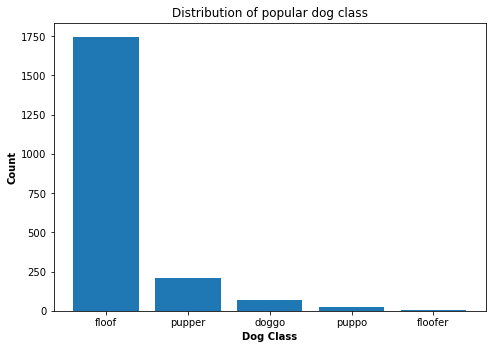

In [103]:
#help: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loc = [1, 2, 3, 4, 5]
data = count_dogs

ax.bar(loc, data, tick_label=['floof', 'pupper', 'doggo', 'puppo', 'floofer'])

plt.title('Distribution of popular dog class');
plt.xlabel('Dog Class', weight='bold');
plt.ylabel('Count', weight='bold');

plt.show()

<hr size="5"/>

## Popular names

In [104]:
# only take columns needed for analysis
df_popularNames = df[['tweet_id','name', 'Dog_Class']].copy()
df_popularNames.sample(5)

,tweet_id,name,Dog_Class
374,816450570814898180,MOOSE,floof
315,825026590719483904,PABLO,puppo
1313,687460506001633280,KRAMER,floof
1803,670691627984359425,ESTER,floof
1358,684538444857667585,NaN,floof


In [105]:
# check for missing names
df_popularNames.isnull().sum()

tweet_id       0
name         568
Dog_Class      0
dtype: int64

In [106]:
df_popularNames.nunique()

tweet_id     2054
name          931
Dog_Class       5
dtype: int64

In [107]:
drop_names = df_popularNames.dropna(how='any')
drop_names.isnull().sum()

tweet_id     0
name         0
Dog_Class    0
dtype: int64

In [108]:
drop_names.nunique()

tweet_id     1486
name          931
Dog_Class       5
dtype: int64

In [109]:
# compare shapre before and after
print('before dropped blank names', df_popularNames.shape)
print('AFTER dropped blank names', drop_names.shape)

before dropped blank names (2054, 3)
AFTER dropped blank names (1486, 3)


In [126]:
count_names = drop_names.groupby('name')['tweet_id'].count().sort_values(ascending=False)
count_names.head(5)

name
A          55
CHARLIE    11
TUCKER     10
PENNY      10
COOPER     10
Name: tweet_id, dtype: int64

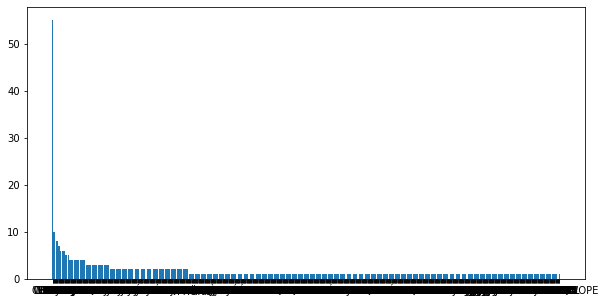

In [122]:
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
    
x = list(count_names.keys())
xloc = count_names

fig = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.show()

In [111]:
lables = list(drop_names.name)
lables

['PHINEAS',
 'TILLY',
 'ARCHIE',
 'DARLA',
 'FRANKLIN',
 'JAX',
 'ZOEY',
 'CASSIE',
 'KODA',
 'BRUNO',
 'TED',
 'STUART',
 'OLIVER',
 'JIM',
 'ZEKE',
 'RALPHUS',
 'GERALD',
 'JEFFREY',
 'SUCH',
 'CANELA',
 'MAYA',
 'MINGUS',
 'DEREK',
 'ROSCOE',
 'WAFFLES',
 'JIMBO',
 'MAISEY',
 'LILLY',
 'EARL',
 'LOLA',
 'KEVIN',
 'YOGI',
 'NOAH',
 'BELLA',
 'GRIZZWALD',
 'RUSTY',
 'GUS',
 'STANLEY',
 'ALFY',
 'KOKO',
 'REY',
 'GARY',
 'A',
 'ELLIOT',
 'LOUIS',
 'BELLA',
 'JESSE',
 'ROMEO',
 'BAILEY',
 'DUDDLES',
 'JACK',
 'STEVEN',
 'BEAU',
 'SNOOPY',
 'SHADOW',
 'EMMY',
 'AJA',
 'PENNY',
 'DANTE',
 'NELLY',
 'GINGER',
 'BENEDICT',
 'VENTI',
 'GOOSE',
 'NUGGET',
 'CASH',
 'JED',
 'SEBASTIAN',
 'WALTER',
 'SIERRA',
 'MONKEY',
 'HARRY',
 'KODY',
 'LASSIE',
 'ROVER',
 'NAPOLEAN',
 'BOOMER',
 'CODY',
 'ZOEY',
 'RUMBLE',
 'CLIFFORD',
 'DEWEY',
 'STANLEY',
 'SCOUT',
 'GIZMO',
 'WALTER',
 'COOPER',
 'HAROLD',
 'SHIKHA',
 'LILI',
 'JAMESY',
 'COCO',
 'BOOMER',
 'SAMMY',
 'NELLY',
 'MEATBALL',
 'PAISLEY',
 '

In [112]:
list(drop_names.name.keys()) 

[0,
 1,
 2,
 3,
 4,
 6,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 80,
 81,
 83,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 107,
 108,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 130,
 132,
 134,
 135,
 136,
 138,
 139,
 141,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 180,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 219,
 221,
 222,
 223,
 225,
 226,
 228,
 229,
 230,
 232,
 233

In [113]:
# creating the dataset 
courses = list(drop_names.name.keys()) 
values = list(drop_names.name.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
#help: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loc = lables.index
data = count_names

ax.bar(loc, data, tick_label=[lables])

plt.title('Distribution of popular dog class');
plt.xlabel('Dog Class', weight='bold');
plt.ylabel('Count', weight='bold');

plt.show()

In [ ]:
plt.figure(figsize=(15,10))
drop_names.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loc = list(drop_names.name.keys()) 
data = count_names

ax.bar(loc, data, tick_label=lables)

plt.title('Distribution of popular dog class');
plt.xlabel('Dog Class', weight='bold');
plt.ylabel('Count', weight='bold');

plt.show()

<hr size="5"/>

<a id='report'></a>
# 5. REPORT-DISCUSSION-CONCLUSION

<a href="#contents">[Table of Contents]</a>

<font color=blue>
    
**5.1 CRITERIA:** The student is able to reflect upon and describe their data wrangling efforts.

**5.1 SPECIFICATION:**

The student’s wrangling efforts are briefly described. This document (wrangle_report.pdf or wrangle_report.html) is concise and approximately 300-600 words in length.

At least one (1) labeled visualization is produced in the Jupyter Notebook using Python’s plotting libraries or in Tableau.

Students must make it clear in their wrangling work that they assessed and cleaned (if necessary) the data upon which the analyses and visualizations are based.

<font color=blue>
    
**5.2 CRITERIA:** The student is able to describe some insights found in their wrangled dataset.

**5.2 SPECIFICATION:**

The three (3) or more insights the student found are communicated. At least one (1) visualization is included.

This document (act_report.pdf or act_report.html) is at least 250 words in length.

<hr size="5"/>

<a id='files'></a>
# 6. PROJECT FILES

<a href="#contents">[Table of Contents]</a>

<font color=blue>
    
**6.1 CRITERIA:** Are all required files included in the student's submission?

**6.1 SPECIFICATION:**
The following files (with identical filenames) are included:

* wrangle_act.ipynb
* wrangle_report.pdf or wrangle_report.html
* act_report.pdf or act_report.html
    
All dataset files are included, including the stored master dataset(s), with filenames and extensions as specified on the Project Submission page.

<hr size="5"/>

# End of Data Project!

Made with ❤️ by Jhon!

Further impovements include...
1. Validation statements using ```assert``` clauses to confirm that data manipuation is correct during cleaning stage

<a href="#contents">[Table of Contents]</a>